**CS5033**

**Assignment # 1**

**Student ID : F2024393033**

**Name: Afza Bano**

**Subject: Impact of COVID-19 on Working Professionals**



In [ ]:
import pandas as pd

#**1.Data Loading & Exploration**

In [ ]:
COVID_data = pd.read_csv('/content/COVID-19.csv')

In [ ]:
COVID_data.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1


In [ ]:
COVID_data.isnull().sum()

,0
Increased_Work_Hours,0
Work_From_Home,0
Hours_Worked_Per_Day,0
Meetings_Per_Day,0
Productivity_Change,0
Stress_Level,0
Health_Issue,0
Job_Security,0
Childcare_Responsibilities,0
Commuting_Changes,0


In [ ]:
COVID_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Team_Collaboration_Challenges  10000 non-null  

#**2.Encode categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lab_encoder = LabelEncoder()

In [ ]:
COVID_data['Stress_Level'] = lab_encoder.fit_transform(COVID_data['Stress_Level'])

In [ ]:
COVID_data['Sector'] = lab_encoder.fit_transform(COVID_data['Sector'])

# **3.Feature engineering**


In [ ]:
COVID_data['WFH_Productivity'] = COVID_data['Work_From_Home'] * COVID_data['Productivity_Change']

# **4.Prepare features (X) and target (y)**


In [ ]:
X = COVID_data.drop(columns=['Productivity_Change'])
y = COVID_data['Productivity_Change']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **5.Scale features**


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **6.Apply SMOTE to balance the dataset**  

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# **7.Split the resampled dataset into training and testing sets**


In [ ]:
X_trn ,X_tst , y_trn , y_tst = train_test_split(X_scaled, y, test_size=0.2 , random_state=42)

# **8.Initialize and train the Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_trn,y_trn)

LogisticRegression(max_iter=1000)

#**9.** **Data visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, ConfusionMatrixDisplay, roc_curve
)

# **10.Predictions**


In [ ]:
y_pred = model.predict(X_tst)
y_pred_proba = model.predict_proba(X_tst)[:, 1]

# **11.Evaluate the model**


In [ ]:
correlation_matrix = COVID_data.corr()

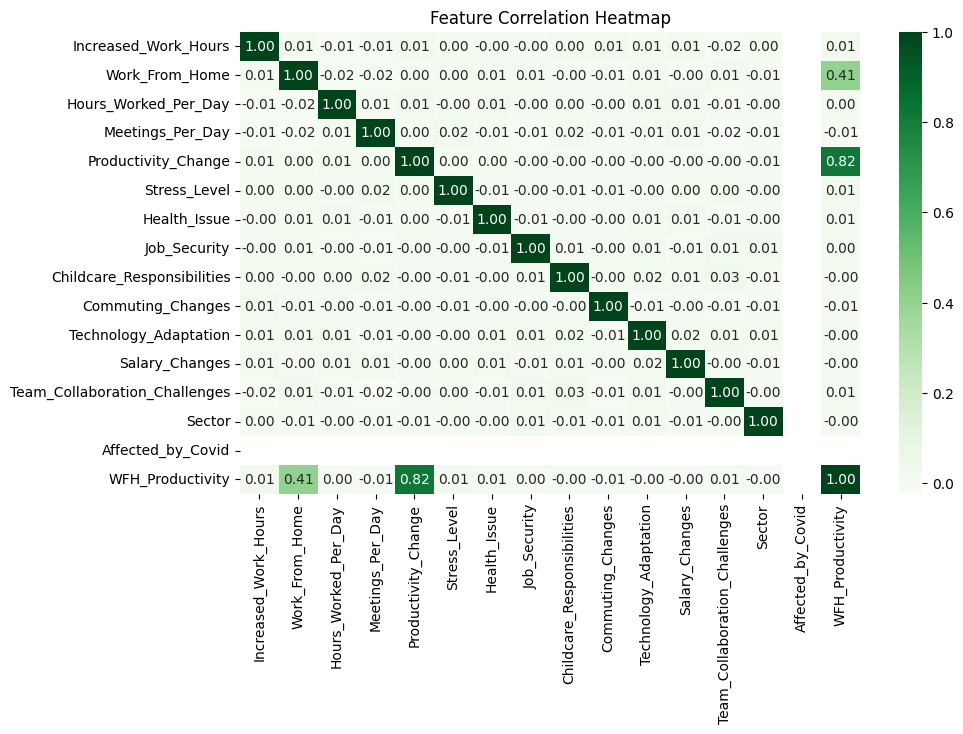

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Greens')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
accuracy = accuracy_score(y_tst, y_pred)
precision = precision_score(y_tst, y_pred, average='binary')  # For binary classification
recall = recall_score(y_tst, y_pred, average='binary')
f1 = f1_score(y_tst, y_pred, average='binary')
roc_auc = roc_auc_score(y_tst, y_pred_proba)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report(y_tst, y_pred))

Model Performance Metrics:
Accuracy: 0.90
Precision: 0.91
Recall: 0.89
F1-Score: 0.90
ROC AUC: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1024
           1       0.91      0.89      0.90       976

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



# **12.Confusion matrix**

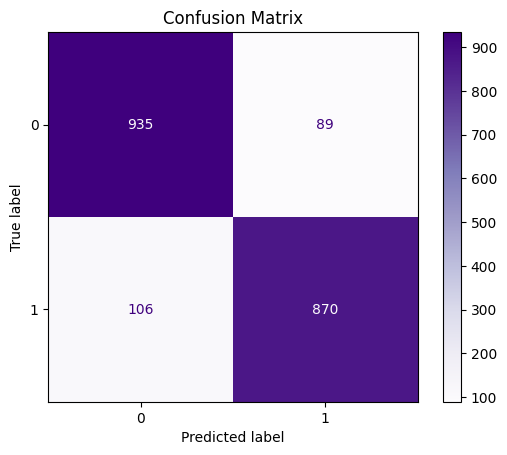

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_tst, y_tst, cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

# **13.ROC curve**

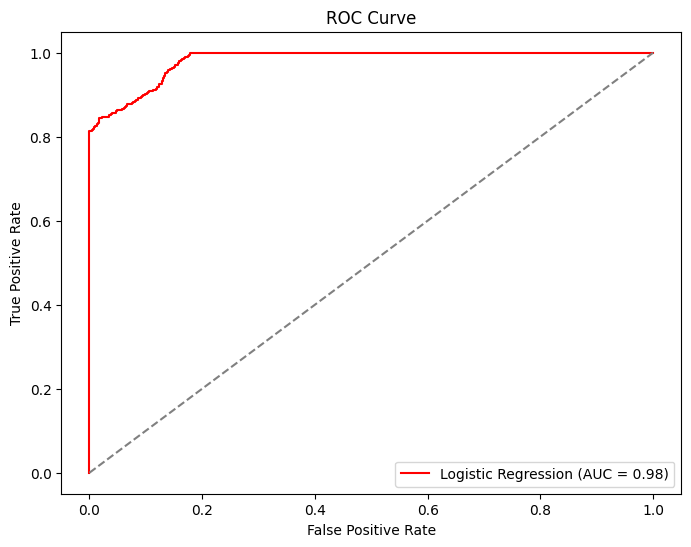

In [ ]:
fpr, tpr, thresholds = roc_curve(y_tst, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='Red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()